In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

from mockobservation_tools.galaxy_tools import (load_halo,
                                                load_sim,
                                                mask_sim_to_halo,
                                                get_mock_observation,
                                                get_mock_massimage,
                                                )


%matplotlib inline


Missing firefly, obtain it at http://github.com/ageller/Firefly or pip install firefly.


# Creating Images used for Science

### Review tutorial 1 for alternative loading methods


### get_mock_observation

I will only focus on kwargs that are needed for science images

Use minden,dynrange for composite images in shown in tutorial 3

At the end I also show an example of getting the a mock projected image of the mass

In [2]:
#Example using the m11c_res2100 and the 600 snap shot

sim = 'm11c_res2100' #defined only to ease defining directories  

snap_num = 600 #snapshot number

# path to the directory holding the simulation snapshot 
sim_path =  '/DFS-L/DATA/cosmo/grenache/aalazar/FIRE/GVB/'+str(sim)+'/output/hdf5/snapdir_'+str(snap_num)+'/'

# path to the directory holding the halo files for the simulation
halo_path = '/DFS-L/DATA/cosmo/grenache/aalazar/FIRE/GVB/'+str(sim)+'/halo/rockstar_dm/hdf5/'


In [3]:
star_snapdict, gas_snapdict = load_sim(sim_path,snap_num)

halo = load_halo(halo_path, snap_num, filetype='hdf5')


In [4]:
#For now you can 
FOV = 25

star_snapdict, gas_snapdict, halo = mask_sim_to_halo(star_snapdict=star_snapdict,
                                                     gas_snapdict=gas_snapdict, 
                                                     host_halo=halo, 
                                                     lim = True,
                                                     limvalue = FOV
                                                    )


In [5]:
get_mock_observation?

### This is a full overview, but I will address import parts in examples

    get_mock_observation(
    star_snapdict,  #Input from load_sim
    gas_snapdict,   #Input from load_sim 
    bands=[1, 2, 3],#You must use 3 bands (created to make composite images with 3 bands)
    FOV=25,         #Field of view, kpc from center to edge
    pixels=500,     #number of pixels across the image, 
    view='xy',      #Orientation based on input coordinates
    center='none',  #center of the image, default [0,0,0]. 'mass'&'light' and the code finds the 
            center='mass' #centers the images on the galaxy center of mass
            center='light' #centers the images on the galaxy center of light
    minden=57650,   #explained in composite image
    dynrange=912.7983347788378,  #explained in composite image
    mass_scalar=1e-10,  #Mock image tool needs units in Mass * 1e10kpc, this converts the input physical units
            If the input is in physcal units, DONOT change this. 
    hsml_scalar=1.4, #scales the smoothing length of the particle.
            This converts the gravitational to cublic spline.
            I would leave this as defult but you can play with the resolution
    return_type='mock_image', #Type of output units
    QUIET=False, #This does a read out of mock image processing
            



     return_type:   What values types are returned, Options:
                    'lum':      Luminosity of each particle in each band (Lsun), length = nparticles
                    'lum_proj': Luminosity per pixel (Lsun/1pixel^2) in each band, shape is (pixel, pixel)
                    'SB_lum':   Luminosity per square distance ((Lsun/kpc^2), shape is (pixel, pixel)
                    'mag':      Magnitude of each particle in each band (Lsun), length = nparticles
                    'mag_proj': Magnitude per pixel (mag/1pixel^2) in each band, shape is (pixel, pixel)
                    'SB_mag':   Magnitude per square angle ((mag/acrsec^2), shape is (pixel, pixel)
                    'mock_image': Mock color image, and the Luminosity per square distance for each band

### Different band options:

    Band indices are: 
    0  - Absolute mag
    1  - SDSS u (unprimed AB)
    2  - SDSS g (unprimed AB)
    3  - SDSS r (unprimed AB)
    4  - SDSS i (unprimed AB)
    5  - SDSS z (unprimed AB)
    6  - U (BESSEL)
    7  - B (BESSEL)
    8  - V (BESSEL)
    9  - R (KPNO)
    10 - I (KPNO)
    11 - J (BESSEL)
    12 - H (BESSEL)
    13 - K (BESSEL)

In [6]:
#The unit best used for science is surface brightnesss 
#The pixel values

band_u, band_g, band_r =get_mock_observation(star_snapdict, 
    gas_snapdict, 
    bands=[1,2,3], 
    FOV=FOV, 
    pixels=500, 
    view='xy', 
    return_type='SB_lum')


Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.15675338 0.09673077 0.07008224]
opacity in each band: [np.float64(1585.979156207648), np.float64(1154.4425319436855), np.float64(799.3864465256439)]
total gas mass: 0.03491722347875767


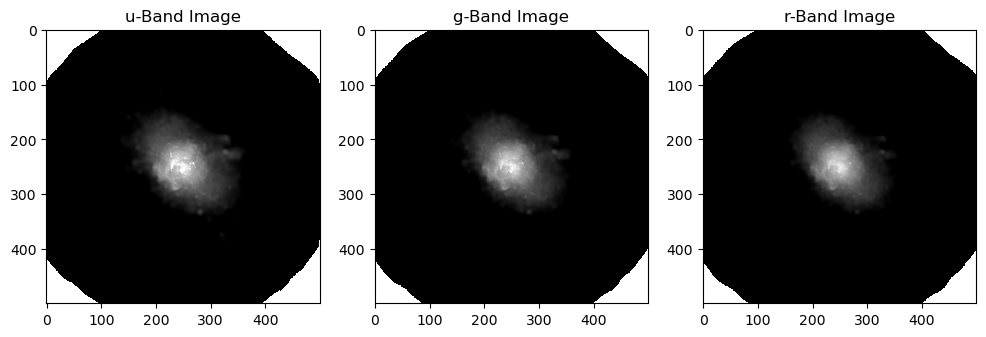

In [7]:
fig = plt.figure(figsize = (12, 4))    

ax = fig.add_subplot(1, 3, 1)  

plt.imshow(band_u,norm=LogNorm(vmin=1e5, vmax=1e8), cmap='grey')
plt.title('u-Band Image')

ax = fig.add_subplot(1, 3, 2)  

plt.imshow(band_g,norm=LogNorm(vmin=1e5, vmax=1e8), cmap='grey')
plt.title('g-Band Image')

ax = fig.add_subplot(1, 3, 3)  

plt.imshow(band_r,norm=LogNorm(vmin=1e5, vmax=1e8), cmap='grey')
plt.title('r-Band Image')


plt.show()

Text(0.5, 1.0, 'r-Band Image')

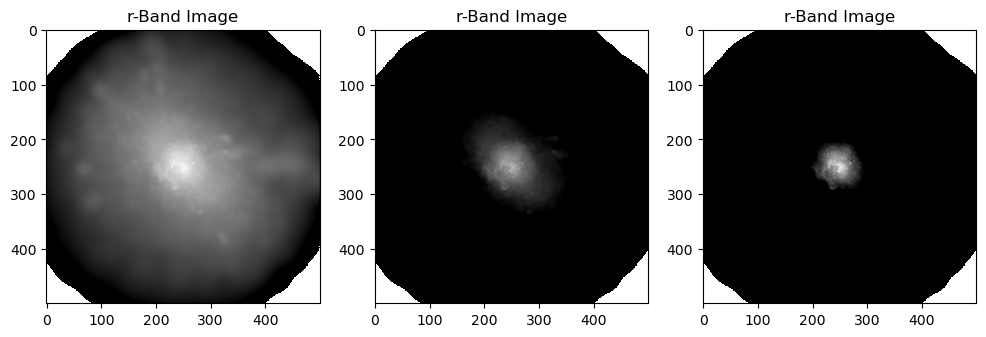

In [8]:
fig = plt.figure(figsize = (12, 4))    

ax = fig.add_subplot(1, 3, 1)  

#You can play with the vmin and max to change view 
#5e4 is a pretty standard limit, its on the order of 30mag/arcesc

plt.imshow(band_r,norm=LogNorm(vmin=1e2, vmax=1e8), cmap='grey')
plt.title('r-Band Image')

ax = fig.add_subplot(1, 3, 2)  

plt.imshow(band_r,norm=LogNorm(vmin=1e5, vmax=1e9), cmap='grey')
plt.title('r-Band Image')

ax = fig.add_subplot(1, 3, 3)  

plt.imshow(band_r,norm=LogNorm(vmin=1e6, vmax=1e8), cmap='grey')
plt.title('r-Band Image')


# Alternatively, we can try some different inputs
Here we changed band, pixel size, centering, and smoothing lenght

In [9]:
#The unit best used for science is surface brightnesss 
#The pixel values

band_U, band_V, band_J = get_mock_observation(star_snapdict, 
    gas_snapdict, 
    bands=[6, 8, 11],
    FOV=FOV, 
    pixels=100, 
    view='zx', 
    center = 'mass',
    hsml_scalar = 5,                         
    return_type='SB_lum')


Calculating L/M in Johnsons U (BAND_ID=6,l=3600 A)
Calculating L/M in Johnsons V (BAND_ID=8,l=5556 A)
Calculating L/M in Cousins J (BAND_ID=11,l=12150 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.10267062 0.06661471 0.07826254]
opacity in each band: [np.float64(1562.8324586151327), np.float64(925.1062772049945), np.float64(261.4228922763493)]
total gas mass: 0.03491722347875767


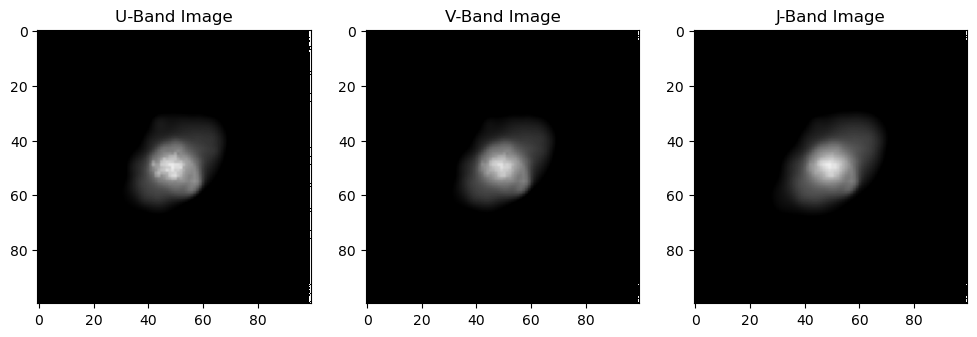

In [10]:
fig = plt.figure(figsize = (12, 4))    

ax = fig.add_subplot(1, 3, 1)  

plt.imshow(band_U,norm=LogNorm(vmin=1e5, vmax=1e8), cmap='grey')
plt.title('U-Band Image')

ax = fig.add_subplot(1, 3, 2)  

plt.imshow(band_V,norm=LogNorm(vmin=1e5, vmax=1e8), cmap='grey')
plt.title('V-Band Image')

ax = fig.add_subplot(1, 3, 3)  

plt.imshow(band_J,norm=LogNorm(vmin=1e5, vmax=1e8), cmap='grey')
plt.title('J-Band Image')


plt.show()

# Using return_type lum

You can test the other return types, however here is an example of  
    
    return_type='lum'

This returns the luminosity of each star particle 


In [11]:
#The unit best used for science is surface brightnesss 
#The pixel values

band_U, band_V, band_J = get_mock_observation(star_snapdict, 
    gas_snapdict, 
    bands=[6, 8, 11],
    pixels=100, 
    view='zx', 
    FOV=FOV,                       
    return_type='lum')


Calculating L/M in Johnsons U (BAND_ID=6,l=3600 A)
Calculating L/M in Johnsons V (BAND_ID=8,l=5556 A)
Calculating L/M in Cousins J (BAND_ID=11,l=12150 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.10267062 0.06661471 0.07826254]
opacity in each band: [np.float64(1562.8324586151327), np.float64(925.1062772049945), np.float64(261.4228922763493)]
total gas mass: 0.03491722347875767


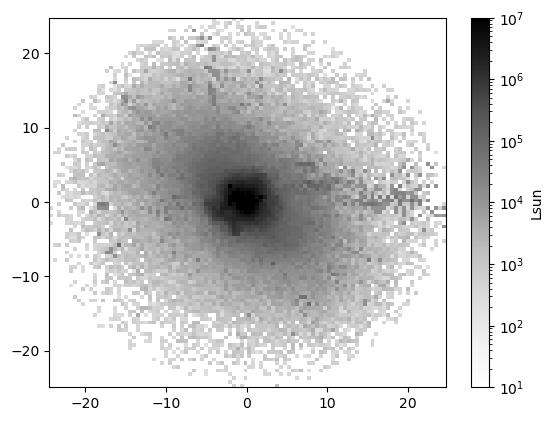

In [12]:
plt.hist2d(star_snapdict['Coordinates'][:,0], star_snapdict['Coordinates'][:,1],
           weights =band_U,
           cmap='Greys',
           bins=100,
           norm=LogNorm(vmin=1e1, vmax=1e7)) 

#note this is in units Lsun, not Lsun/kpc2 as is it for SB_lum
#This also means you would need to adjust the norm based on the number of pixels 
#When using the surface brightness, or Lsun/kpc2, the norm will be independent of the number of pixels

plt.colorbar(label='Lsun')


## Mock Mass

This is similar to a 2d mass weighted histogram, the difference is that the particles have been smoothed

The inputs for this function are almost identical as the mock image one as it uses the same processing

The out put is a stellar mass image and the number of stars

It will look like it is doing the normal imaging but when it says:\
    
    total lum before attenuation in each band (Lsun/1e10): [0.0923968 0.0923968 0.0923968]
    
This is actually the total stellar mass and 
    
    opacity in each band: [0. 0. 0.]
    
is that there is no gas extinction included


You can use 2 different return types:\
mass: give the image with units of Msun 
mass_density: give the image with units of Msun/kpc^2

In [13]:
get_mock_massimage?

In [14]:

mass_image, nstars = get_mock_massimage(star_snapdict, 
                                        gas_snapdict,
                                        view='xy',
                                        FOV=FOV,
                                        pixels=500,
                                        return_type='mass')            

massdensity_image, nstars = get_mock_massimage(star_snapdict, 
                                        gas_snapdict,
                                        view='xy',
                                        FOV=FOV,
                                        pixels=500,
                                        return_type='mass_density')            

Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.0923968 0.0923968 0.0923968]
opacity in each band: [0. 0. 0.]
total gas mass: 0.03491722347875767
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.0923968 0.0923968 0.0923968]
opacity in each band: [0. 0. 0.]
total gas mass: 0.03491722347875767


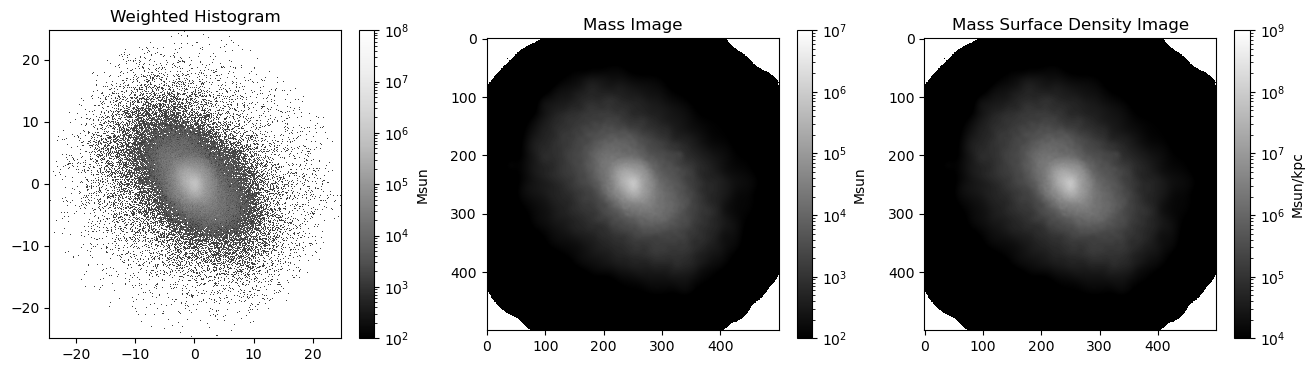

In [15]:
# units are in Msun/pixel
fig = plt.figure(figsize = (16, 4))    

ax = fig.add_subplot(1, 3, 1)  

#weighted histogram
plt.hist2d(star_snapdict['Coordinates'][:,0], star_snapdict['Coordinates'][:,1],
           weights =star_snapdict['Masses'],
           cmap='Greys_r',
           bins=500,
           norm=LogNorm(vmin=1e2, vmax=1e8)) 
plt.colorbar(label='Msun')

plt.title('Weighted Histogram')

ax = fig.add_subplot(1, 3, 2)  

plt.imshow(mass_image,norm=LogNorm(vmin=1e2, vmax=1e7), cmap='grey')
plt.colorbar(label='Msun')
plt.title('Mass Image')



ax = fig.add_subplot(1, 3, 3)  

plt.imshow(massdensity_image,norm=LogNorm(vmin=1e4, vmax=1e9), cmap='grey')
plt.colorbar(label='Msun/kpc')
plt.title('Mass Surface Density Image')

plt.show()